In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae, root_mean_squared_error as rmse

import joblib

In [151]:
df = pd.read_csv(r"C:\Users\USER\Desktop\DataGin_Python_Project\CSV_Files\student_exam_scores.csv")
df.head(2)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0


In [152]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [154]:
df.head(2)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0


In [155]:
#putting the feature in a variable
hours_studied = df['hours_studied']
sleep_hours = df['sleep_hours']
attendance_percent = df['attendance_percent']
previous_score = df['previous_scores']
exam_score = df['exam_score']

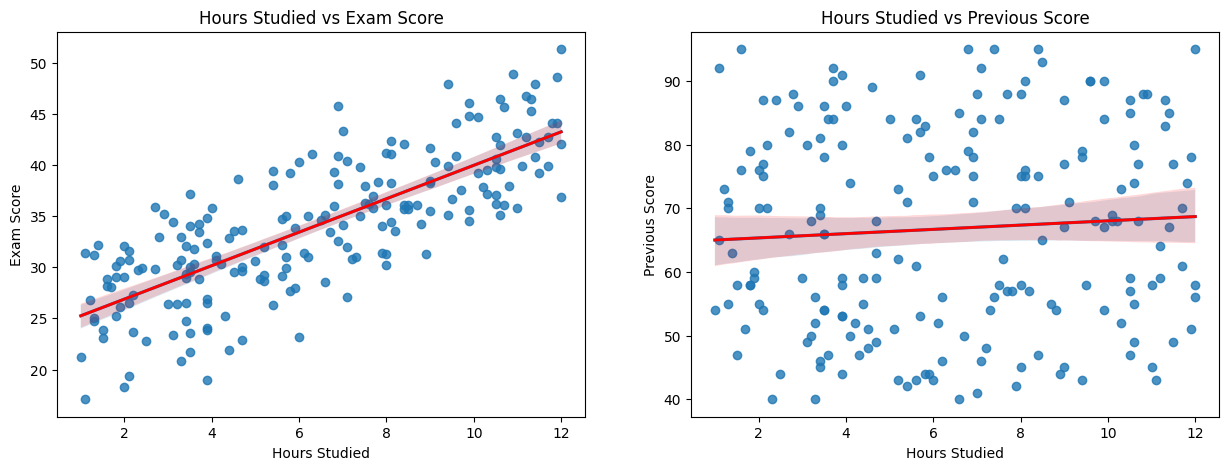

In [156]:
#checking for relationship
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.regplot(x = hours_studied, y = exam_score, data = df)
sns.regplot(x = hours_studied, y = exam_score, data = df, scatter = False, color = 'red', line_kws={'linewidth': 2})
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Hours Studied vs Exam Score')

plt.subplot(1,2,2)
sns.regplot(x = hours_studied, y = previous_score, data = df)
sns.regplot(x = hours_studied, y = previous_score, data = df, scatter = False, color = 'red', line_kws={'linewidth': 2})
plt.xlabel('Hours Studied')
plt.ylabel('Previous Score')
plt.title('Hours Studied vs Previous Score')
plt.show()


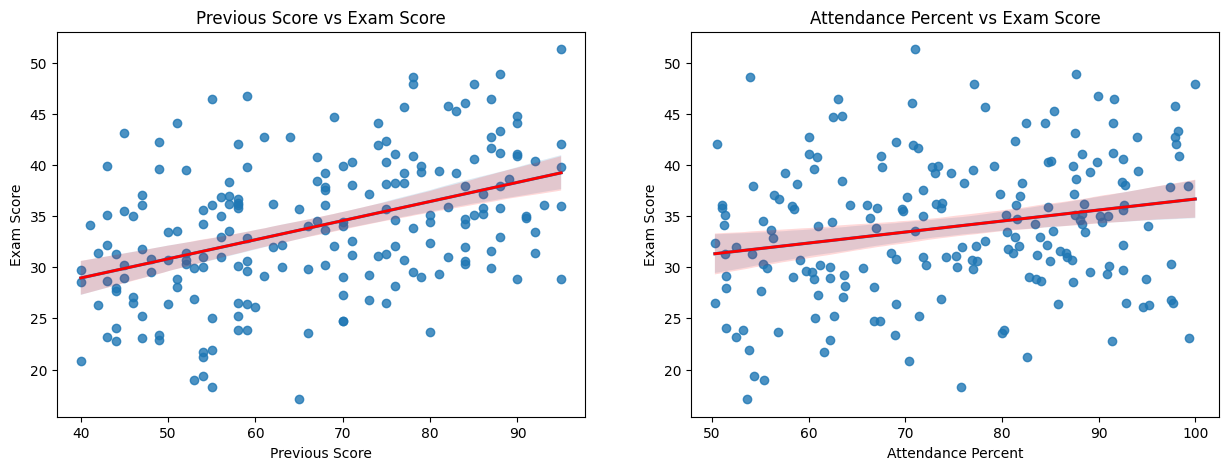

In [157]:
#checking for relationship
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.regplot(x = previous_score, y = exam_score, data = df)
sns.regplot(x = previous_score, y = exam_score, data = df, scatter = False, color = 'red', line_kws={'linewidth': 2})
plt.xlabel('Previous Score')
plt.ylabel('Exam Score')
plt.title('Previous Score vs Exam Score')

plt.subplot(1,2,2)
sns.regplot(x = attendance_percent, y = exam_score, data = df)
sns.regplot(x = attendance_percent, y = exam_score, data = df, scatter = False, color = 'red', line_kws={'linewidth': 2})
plt.xlabel('Attendance Percent')
plt.ylabel('Exam Score')
plt.title('Attendance Percent vs Exam Score')
plt.show()


In [110]:
df.head(2)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0


In [158]:
#spliting the data into independent and dependent variable
x = df.drop(columns = ['student_id', 'exam_score', 'previous_scores'])
y = df['exam_score']

In [159]:
x

,hours_studied,sleep_hours,attendance_percent
0,8.0,8.8,72.1
1,1.3,8.6,60.7
2,4.0,8.2,73.7
3,3.5,4.8,95.1
4,9.1,6.4,89.8
...,...,...,...
195,10.5,5.4,94.0
196,7.1,6.1,85.1
197,1.6,6.9,63.8
198,12.0,7.3,50.5


In [160]:
# spliting the data for trainning
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [161]:
#t training the model with the data
model = LinearRegression()

model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [162]:
# predicting the score of X_test
y_pred = model.predict(x_test)
y_pred

array([33.38683999, 33.29128601, 36.52716364, 30.29072381, 38.81323128,
       43.67267456, 26.43479239, 43.34701246, 38.09461205, 30.73643455,
       28.09440851, 44.3788562 , 28.7957623 , 31.75544221, 39.71798509,
       32.56012821, 29.18579419, 31.69688373, 35.1413439 , 32.62340028,
       25.31533464, 27.879047  , 30.5452763 , 29.51779688, 37.37398456,
       41.2623797 , 34.58138794, 28.22489334, 33.23929885, 42.02246119,
       25.92410352, 41.14143528, 38.089399  , 34.12509299, 45.12971279,
       26.51329722, 36.30356287, 40.2733888 , 42.57025122, 41.36056213])

In [169]:
# Evaluating the model
mean_square = mse(y_pred, y_test)
mean_absolute = mae(y_pred, y_test)
r_2 = r2(y_pred, y_test)
root_mean = rmse(y_pred, y_test)

print(f'\nMean Squared Error: {mean_square}')
print('-' * 40)
print(f'\nMean Absolute Error: {mean_absolute}')
print('-' * 40)
print(f'\nR Square: {r_2}')
print('-' * 40)
print(f'\nRoot Mean Squared Error {root_mean}')
print('-' * 40)


Mean Squared Error: 14.371927686788581
----------------------------------------

Mean Absolute Error: 3.1633684803115325
----------------------------------------

R Square: 0.5649369490160421
----------------------------------------

Root Mean Squared Error 3.7910325357069388
----------------------------------------


In [170]:
# model coef
model.coef_

array([1.61225954, 0.41950929, 0.11952871])

In [171]:
# model intercept
model.intercept_

np.float64(12.110015777585225)

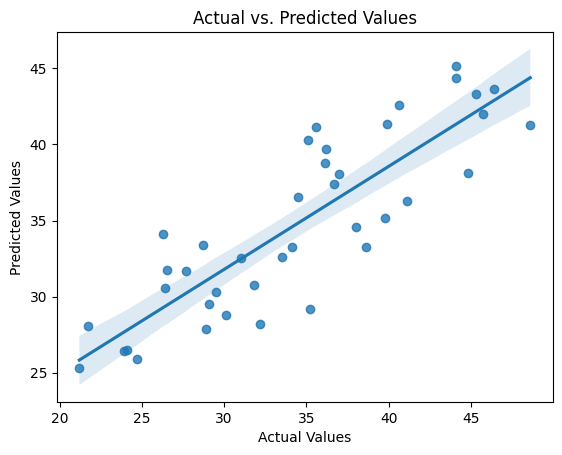

In [173]:
# visualizing the model result
sns.regplot(x =y_test, y=  y_pred )
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [177]:
new_data = pd.DataFrame({'hours_studied': [30],
                         'sleep_hours': [20],
                         'attendance_percent': [60]})

In [178]:
model.predict(new_data)

array([76.0397103])

In [180]:
#save model
joblib.dump(model, 'student_exam_score_prediction.joblib')
print(f'\nModel Saved!')



Model Saved!
